## Импорт библиотек

In [ ]:
%%capture
!pip install catboost
!pip install opentsne
!pip install umap-learn

In [ ]:
# Data manipulation
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

# Data preprocessing
from sklearn.model_selection import train_test_split as tts

# Dimensionality Reduction
from openTSNE.sklearn import TSNE
import umap
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

# tqdm
from tqdm.auto import tqdm

# warnings
import warnings
warnings.filterwarnings('ignore')

## Импорт данных и первичный обзор

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_05_visualization/all_data.csv")

data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261,Unnamed: 262,Unnamed: 263,Unnamed: 264,Unnamed: 265,Unnamed: 266,Unnamed: 267,Unnamed: 268,Unnamed: 269,Unnamed: 270,Unnamed: 271,Unnamed: 272,Unnamed: 273,Unnamed: 274,Unnamed: 275,Unnamed: 276,Unnamed: 277,Unnamed: 278,Unnamed: 279,Unnamed: 280,Unnamed: 281,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287,Unnamed: 288,Unnamed: 289,Unnamed: 290,Unnamed: 291,Unnamed: 292,Unnamed: 293,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 298,Unnamed: 299,Unnamed: 300,Unnamed: 301,Unnamed: 302,Unnamed: 303,Unnamed: 304,Unnamed: 305,Unnamed: 306,Unnamed: 307,Unnamed: 308,Unnamed: 309,Unnamed: 310,Unnamed: 311,Unnamed: 312,Unnamed: 313,Unnamed: 314,Unnamed: 315,U

- **Data set size**

In [ ]:
rows, cols = data.shape[0], data.shape[1]

print(f'Rows: {rows}')
print(f'Columns: {cols}')

Rows: 230
Columns: 537


- **Data set information**

In [ ]:
print("##" * 30)
print(" " * 17, "Data set information")
print("##" * 30)
print(data.info())

############################################################
                  Data set information
############################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Columns: 537 entries, Unnamed: 0 to Label
dtypes: float64(536), int64(1)
memory usage: 965.0 KB
None


In [ ]:
!pip install ydata_profiling

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


## Создание X и y для обучения моделей

In [ ]:
data_new = data[data.columns[:-1]].copy()
data_new.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261,Unnamed: 262,Unnamed: 263,Unnamed: 264,Unnamed: 265,Unnamed: 266,Unnamed: 267,Unnamed: 268,Unnamed: 269,Unnamed: 270,Unnamed: 271,Unnamed: 272,Unnamed: 273,Unnamed: 274,Unnamed: 275,Unnamed: 276,Unnamed: 277,Unnamed: 278,Unnamed: 279,Unnamed: 280,Unnamed: 281,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287,Unnamed: 288,Unnamed: 289,Unnamed: 290,Unnamed: 291,Unnamed: 292,Unnamed: 293,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 298,Unnamed: 299,Unnamed: 300,Unnamed: 301,Unnamed: 302,Unnamed: 303,Unnamed: 304,Unnamed: 305,Unnamed: 306,Unnamed: 307,Unnamed: 308,Unnamed: 309,Unnamed: 310,Unnamed: 311,Unnamed: 312,Unnamed: 313,Unnamed: 314,Unnamed: 315,U

In [ ]:
data['Label'].value_counts()

0    115
1    115
Name: Label, dtype: int64

## Задание 1.

Проведите анализ эффективности алгоритма PCA с разными параметрами n_components = {1, 2, 3}. Постройте bar с cumulative variance performance в зависимости от n_components. Затем на тот же график нанесите линейный график с cumulative explained variance в зависимости от параметра n_components.

In [ ]:
pca = PCA(n_components = 3, random_state = 1234)

data_pca = pca.fit_transform(data_new)

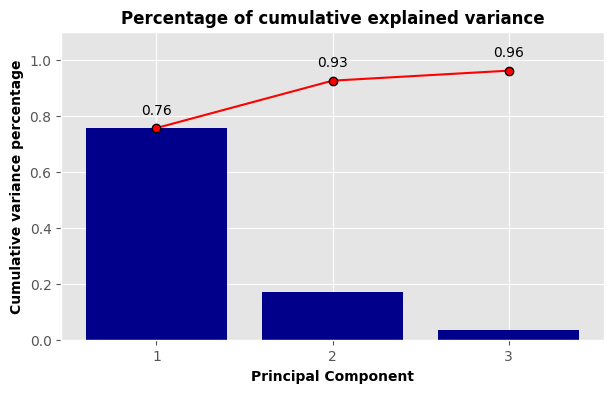

In [ ]:
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(
    np.arange(len(pd.DataFrame(data_pca).columns)) + 1,
    prop_varianza_acum,
    marker = 'o',
    color = 'red',
    markeredgecolor = 'black',
)

ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_,
    color = 'darkblue'
)

for x, y in zip(np.arange(len(pd.DataFrame(data_pca).columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Percentage of cumulative explained variance', fontsize = 12, fontweight = 'bold', color = 'black')
ax.set_xlabel('Principal Component',  fontsize = 10, fontweight = 'bold', color = 'black')
ax.set_ylabel('Cumulative variance percentage',  fontsize = 10, fontweight = 'bold', color = 'black')
fig.show()

## Задание 2.

Постройте трехмерный график `scatter plot`. Нанесите на него результаты работы алгоритмы PCA. Все точки покрасьте в цвета в зависимости от их лэйбла. В название графика вынесите долю объясненной дисперсии.

In [ ]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    data_pca, x=0, y=1, z=2, color=data['Label'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

## Задание 3. TSNE.

Аналогично с заданием 2, проведите алгоритм TSNE и постройте трехмерный график работы нашего алгоритма.

In [ ]:
tsne = TSNE(n_components = 3, random_state = 1234)

data_tsne = tsne.fit_transform(data_new)

In [ ]:
fig = px.scatter_3d(
    data_tsne, x=0, y=1, z=2, color=data['Label'],
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

## Задание 4. UMAP

К сожалению, ранее мы не уделяли внимание в курсе другому популярному алгоритму - `UMAP`.

UMAP (Uniform Manifold Approximation and Projection) — это алгоритм понижения размерности, основанный на топологических принципах.

Основные особенности UMAP:

**Топологическая структура данных**: UMAP стремится сохранить топологическую структуру исходных данных при понижении размерности. Это означает, что он пытается сохранить как локальную, так и глобальную структуру данных.

**Гибкость**: UMAP имеет несколько параметров, которые можно настроить в зависимости от специфики данных и задачи, включая количество соседей и минимальное расстояние между точками в низкоразмерном пространстве.

**Эффективность**: UMAP, как правило, работает быстрее, чем t-SNE, особенно на больших наборах данных.

**Применение**: UMAP может использоваться не только для визуализации данных, но и как этап предварительной обработки в задачах кластеризации, классификации и других.


Визуализируйте результаты работы алгоритма UMAP аналогично заданиям 2 и 3.

In [ ]:
umap_red = umap.UMAP(n_components = 3, random_state = 1234)

data_umap = umap_red.fit_transform(data_new)

In [ ]:
fig = px.scatter_3d(
    data_umap, x=0, y=1, z=2, color=data['Label'],
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

## Задание 5. Сравнение результатов

Давайте попробуем разделить нашу выборку на test и train и посмотреть как изменятся результаты работы наших алгоритмов. Давайте построим результаты работы тех же самых алгоритмов.

In [ ]:
X = data.drop('Label', axis = 1)
y = data['Label']

SEED = 123

X_train, X_test, y_train, y_test = tts(X,
                                       y,
                                       test_size = 0.2,
                                       random_state = SEED,
                                       stratify = y)

In [ ]:
y_train.value_counts(normalize = False)

1    92
0    92
Name: Label, dtype: int64

In [ ]:
y_test.value_counts(normalize = False)

0    23
1    23
Name: Label, dtype: int64

- **PCA**

In [ ]:
pca = PCA(n_components = 3, random_state = SEED)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [ ]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    X_train_pca, x=0, y=1, z=2, color=y_train,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

- **TSNE**

In [ ]:
tsne = TSNE(n_components = 3, random_state = SEED)

X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.transform(X_test)

In [ ]:
fig = px.scatter_3d(
    X_train_tsne, x=0, y=1, z=2, color=y_train,
    labels={'0': '1', '1': '2', '2': '3'}
)
fig.show()

- **UMAP**

In [ ]:
umap_reduction = umap.UMAP(n_components = 3, random_state = SEED)

X_train_umap = umap_reduction.fit_transform(X_train)
X_test_umap = umap_reduction.transform(X_test)

In [ ]:
fig = px.scatter_3d(
    X_train_umap, x=0, y=1, z=2, color= y_train,
    labels={'0': '1', '1': '2', '2': '3'}
)
fig.show()

## Задание 6. Сравнение

Постройте следующие модели классификации:

- Logistic Regression
- Random Forest Classifier
- Extra Trees Classifier
- XGB Classifier
- LGBM Classifier
- CatBoost Classifier

Для каждого алгоритма используйте три разных набора данных: наборы данных после работы алгоритмов PCA, T-SNE, UMAP.

In [ ]:
X_train_final = [X_train_pca, X_train_tsne, X_train_umap]
X_test_final = [X_test_pca, X_test_tsne, X_test_umap]
reductions = ['PCA', 'TSNE', 'UMAP']

In [ ]:
clf1 = LogisticRegression(random_state = SEED)
clf2 = RandomForestClassifier(random_state = SEED)
clf3 = ExtraTreesClassifier(random_state = SEED)
clf4 = XGBClassifier(random_state = SEED)
clf5 = LGBMClassifier(random_state = SEED, verbosity = -1)
clf6 = CatBoostClassifier(random_state = SEED, verbose = 0)

MODELS = [clf1, clf2, clf3, clf4, clf5, clf6]

In [ ]:
names = []

reduction_train = {'PCA':[], 'TSNE':[], 'UMAP':[]}
reduction_test = {'PCA':[], 'TSNE':[], 'UMAP':[]}

for model in tqdm(MODELS):
    name = type(model).__name__
    names.append(name)

    for i,(x_train, x_test, reduction) in enumerate(zip(X_train_final, X_test_final, reductions)):
        model.fit(x_train, y_train)
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)

        accuracy_train = accuracy_score(y_train, y_pred_train)
        reduction_train[reduction].append(accuracy_train)

        accuracy_test = accuracy_score(y_test, y_pred_test)
        reduction_test[reduction].append(accuracy_test)

    print(f'* {name} finished.')

  0%|          | 0/6 [00:00<?, ?it/s]

* LogisticRegression finished.
* RandomForestClassifier finished.
* ExtraTreesClassifier finished.
* XGBClassifier finished.
* LGBMClassifier finished.
* CatBoostClassifier finished.


## Задание 7

Постройте две heatmap. Каждая тепловая карта должна иметь 6 строчек (по числу классификационных моделей) и 3 столбца (по числу алгоритмов понижения размерности). Числовые значения внутри каждой строчки должны содержать Accuracy Score.

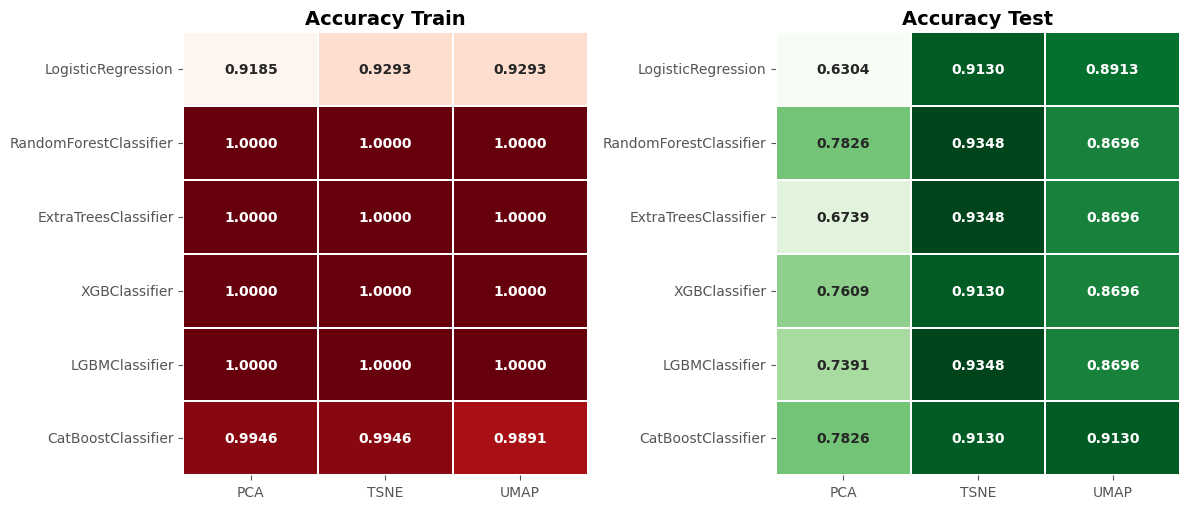

In [ ]:
fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5.2))
axs = axs.flat

sns.heatmap(pd.DataFrame(index = names, data = reduction_train),
            cmap = 'Reds',
            annot = True,
            annot_kws = {'fontweight':'bold'},
            fmt = '.4f',
            linewidths = 1.1,
            square = False,
            cbar = False,
            ax = axs[0])
sns.heatmap(pd.DataFrame(index = names, data = reduction_test),
            cmap = 'Greens',
            annot = True,
            annot_kws = {'fontweight':'bold'},
            fmt = '.4f',
            linewidths = 1.1,
            square = False,
            cbar = False,
            ax = axs[1])
axs[0].set_title("Accuracy Train", fontsize = 14, fontweight = 'bold', color = 'black')
axs[1].set_title("Accuracy Test", fontsize = 14, fontweight = 'bold', color = 'black')

fig.tight_layout()
fig.show()

## Задание 8.

Выберите наилучшую модель из задания 7 и постройте следующие метрики качества: Classification Report, Confusion Matrix, Precision Recall Curve, ROC Curve.

In [ ]:
model = RandomForestClassifier(random_state = SEED)
model.fit(X_train_tsne, y_train)

y_pred_train = model.predict(X_train_tsne)
y_pred_test = model.predict(X_test_tsne)

y_pred_prob_train = model.predict_proba(X_train_tsne)[:,1]
y_pred_prob_test = model.predict_proba(X_test_tsne)[:,1]

- **Classification report**

In [ ]:
print("##" * 40)
print(" " * 25, "Classification Report Train")
print("##" * 40)
print(classification_report(y_train, y_pred_train))
print("")

print("##" * 40)
print(" " * 25, "Classification Report Test")
print("##" * 40)
print(classification_report(y_test, y_pred_test))

################################################################################
                          Classification Report Train
################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        92

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184


################################################################################
                          Classification Report Test
################################################################################
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.95      0.91      0.93        23

    accuracy                           0.93        46
   macro avg       0.94

- **Confusion Matrix**

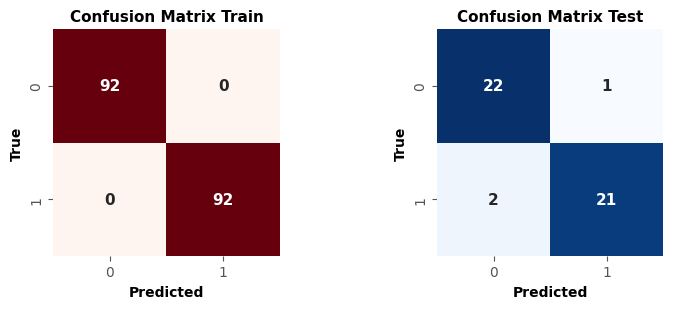

In [ ]:
cf_mx_train = confusion_matrix(y_train, y_pred_train)
cf_mx_test = confusion_matrix(y_test, y_pred_test)

fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (8,3.2))
axs = axs.flat

sns.heatmap(cf_mx_train, cmap = 'Reds', annot = True, annot_kws = {'fontsize':11, 'fontweight':'bold'}, fmt = '', cbar = False, square = True, ax = axs[0])
sns.heatmap(cf_mx_test, cmap = 'Blues', annot = True, annot_kws = {'fontsize':11, 'fontweight':'bold'}, fmt = '', cbar = False, square = True, ax = axs[1])
axs[0].set_xlabel('Predicted', fontsize = 10, fontweight = "bold", color = "black")
axs[1].set_xlabel('Predicted', fontsize = 10, fontweight = "bold", color = "black")
axs[0].set_ylabel('True', fontsize = 10, fontweight = "bold", color = "black")
axs[1].set_ylabel('True', fontsize = 10, fontweight = "bold", color = "black")
axs[0].set_title('Confusion Matrix Train', fontsize = 11, fontweight = "bold", color = "black")
axs[1].set_title('Confusion Matrix Test', fontsize = 11, fontweight = "bold", color = "black")

fig.tight_layout()
fig.show()

- **Precision Recall Curve**

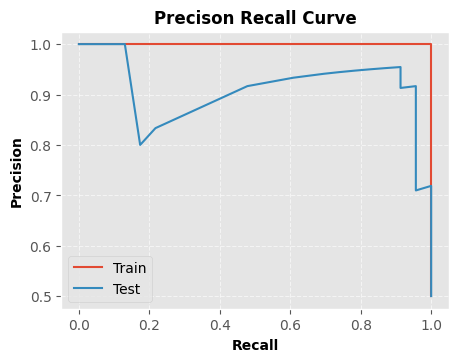

In [ ]:
precision_train, recall_train, _ = precision_recall_curve(y_train, y_pred_prob_train)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_pred_prob_test)

plt.figure(figsize = (5,3.6))
plt.plot(recall_train, precision_train, label = 'Train')
plt.plot(recall_test, precision_test, label = 'Test')
plt.xlabel("Recall", fontsize = 10, fontweight = 'bold', color = 'black')
plt.ylabel("Precision", fontsize = 10, fontweight = 'bold', color = 'black')
plt.title("Precison Recall Curve", fontsize = 12, fontweight = 'bold', color = 'black')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

- **ROC curve**

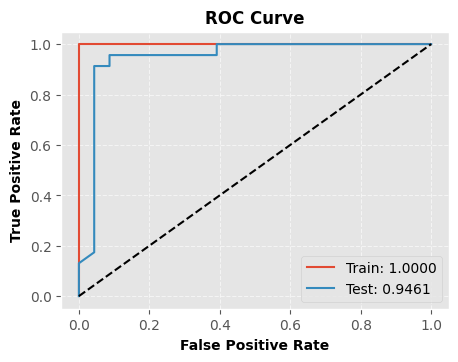

In [ ]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_prob_train)
auc_train = roc_auc_score(y_train, y_pred_prob_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_prob_test)
auc_test = roc_auc_score(y_test, y_pred_prob_test)

plt.figure(figsize = (5,3.6))
plt.plot(fpr_train, tpr_train, label = f'Train: {auc_train:.4f}')
plt.plot(fpr_test, tpr_test, label = f'Test: {auc_test:.4f}')
plt.xlabel("False Positive Rate", fontsize = 10, fontweight = 'bold', color = 'black')
plt.ylabel("True Positive Rate", fontsize = 10, fontweight = 'bold', color = 'black')
plt.title("ROC Curve", fontsize = 12, fontweight = 'bold', color = 'black')
plt.legend()
plt.plot([0,1], linestyle = '--', color = 'black')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()